In [4]:
!pip install python-doctr[torch]
!pip install -e git+https://github.com/mindee/doctr.git#egg=python-doctr[torch]
!sudo apt-get install fonts-freefont-ttf -y
!pip install python-doctr
!pip install tf2onnx
!pip install FastAPI
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining python-doctr[torch] from git+https://github.com/mindee/doctr.git#egg=python-doctr[torch]
  Updating ./src/python-doctr clone
  Running command git fetch -q --tags
  Running command git reset --hard -q acb9f64b11ebad8e53ac60737fcde8dbd3158a22
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Attempting uninstall: python-doctr
    Found existing installation: python-doctr 0.6.0
    Uninstalling python-doctr-0.6.0:
      Successfully uninstalled python-doctr-0.6.0
  Running setup.py develop for python-doctr
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-freefont-ttf is already the newest version (20120503-7).
The following package was automatically insta

In [8]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [9]:
doc = DocumentFile.from_pdf("/content/Cash-Payment-Receipt-Template.pdf")
print(f"Number of pages: {len(doc)}")

Number of pages: 1


In [13]:
# Instantiate a pretrained model
model = ocr_predictor(pretrained=True)

In [14]:
out = model(doc)

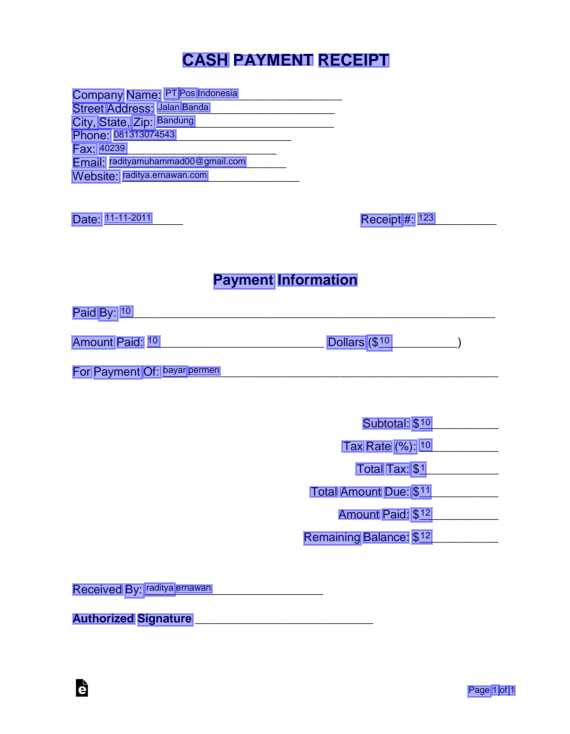

In [15]:
for page, img in zip(out.pages, doc):
  page.show(img, block="false")

In [22]:
json_output = out.export()
from pprint import pprint 
pprint(json_output['pages'][0]['blocks'])

[{'artefacts': [],
  'geometry': ((0.3154296875, 0.064453125), (0.6865234375, 0.0830078125)),
  'lines': [{'geometry': ((0.3154296875, 0.064453125),
                          (0.6865234375, 0.0830078125)),
             'words': [{'confidence': 0.9999608993530273,
                        'geometry': ((0.3154296875, 0.064453125),
                                     (0.3984375, 0.0830078125)),
                        'value': 'CASH'},
                       {'confidence': 0.9946005940437317,
                        'geometry': ((0.408203125, 0.06640625),
                                     (0.5498046875, 0.0810546875)),
                        'value': 'PAYMENT'},
                       {'confidence': 0.9928819537162781,
                        'geometry': ((0.5595703125, 0.0654296875),
                                     (0.6865234375, 0.0830078125)),
                        'value': 'RECEIPT'}]}]},
 {'artefacts': [],
  'geometry': ((0.1162109375, 0.1123046875), (0.4140625, 0.20507812

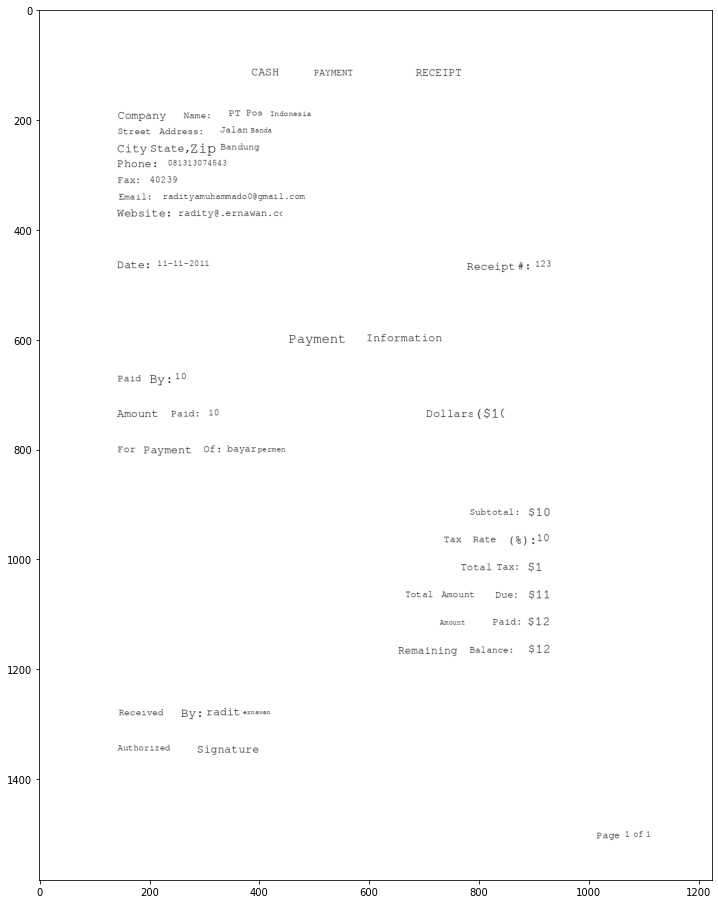

In [25]:
import matplotlib.pyplot as plt
synthetic_pages = out.synthesize()
plt_1 = plt.figure(figsize=(16, 16))
plt.imshow(synthetic_pages[0])
plt.show()

In [26]:
text = out.render()
text

'CASH PAYMENT RECEIPT\n\nCompany Name: PT Pos Indonesia\nStreet Address: Jalan Banda\nCity, State, Zip: Bandung\nPhone: 081313074543\nFax: 40239\n\nEmail: radityamuhammado0@gmail.com\nWebsite: radity@.ernawan.com\n\nDate: 11-11-2011\n\nReceipt #: 123\n\nPayment Information\n\nPaid By: 10\nAmount Paid: 10\n\nDollars ($10\n\nFor Payment Of: bayar permen\n\nSubtotal: $10\nTax Rate (%): 10\nTotal Tax: $1\n\nTotal Amount Due: $11\nAmount Paid: $12\nRemaining Balance: $12\n\nReceived By: raditya ernawan\nAuthorized Signature\n\nPage 1 of 1'

In [29]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/getOCR")
async def root():
  message = "Success"
  code = 200
  data = text
  return {
      "message": message,
      "code" : code,
      "data" : data
}